In [127]:
import numpy as np
import pandas as pd

import stellarpunk.sim as sim

In [128]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generating a Universe

In [129]:
generator = sim.UniverseGenerator()
pchain = generator.generate_chain()

In [130]:
pchain.ranks

array([4, 8, 6, 3])

In [131]:
slices = [np.s_[pchain.ranks[0:i].sum():pchain.ranks[0:i+1].sum()] for i in range(len(pchain.ranks))]

# Resources Needed per Sink

In [155]:
raw_needs = (pchain.adj_matrix[slices[0], slices[1]] @ pchain.adj_matrix[slices[1], slices[2]] @ pchain.adj_matrix[slices[2], slices[3]])
raw_needs

array([[3.80100e+03, 3.72050e+04, 9.70000e+02],
       [1.65360e+04, 2.24726e+05, 4.50000e+02],
       [1.60660e+04, 1.12164e+05, 1.06400e+03],
       [1.53740e+04, 2.39002e+05, 2.20000e+02]])

In [162]:
# raw resources needed for one ship (0 => ship, 1 => station, 2 => consumer)
raw_needs[:,0]

array([ 3801., 16536., 16066., 15374.])

In [175]:
raw_needs = pchain.adj_matrix[slices[0], slices[0+1]]
for i in range(1, len(slices)-1):
    raw_needs = raw_needs @ pchain.adj_matrix[slices[i], slices[i+1]]
raw_needs

array([[3.80100e+03, 3.72050e+04, 9.70000e+02],
       [1.65360e+04, 2.24726e+05, 4.50000e+02],
       [1.60660e+04, 1.12164e+05, 1.06400e+03],
       [1.53740e+04, 2.39002e+05, 2.20000e+02]])

# What the Chain Looks Like

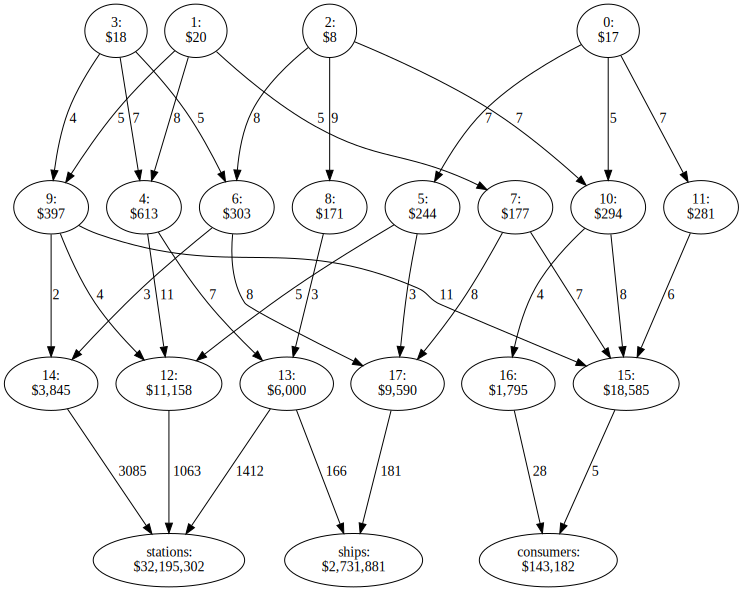

In [133]:
pchain.viz()